In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import json
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Load the JSON file
reviews = []
for line in open('/content/drive/MyDrive/NLP/Assignment 1/reviews_Amazon_Instant_Video_5.json', 'r'):
    reviews.append(json.loads(line))
reviews=reviews[:2000]    

# Define a regular expression pattern to match relevant sentences
#this regular expression pattern matches any sentence in a text that ends with a period,
# exclamation point, or question mark, 
#or any sentence that ends with an exclamation point, or any sentence that contains at least one capital letter. 
pattern = r'([A-Z][^\.\?!]*[\.\?!])|([\w\s]*[!][\w\s]*)|([\w\s]*[A-Z][\w\s]*)'

# Define a list of stop words to filter out from the tokenized text
stop_words = set(stopwords.words('english'))

# Initialize the results list

# Loop through each review in the JSON data and extract relevant information


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Part 1

##Descriptive Statistics

In [30]:

results=[]
for review in reviews:
  text = review['reviewText']
  summary = review['summary']
  for sentence in sent_tokenize(text):
        if re.match(pattern, sentence):
            tokens = word_tokenize(sentence)
            tokens_filtered = [t for t in tokens if t.lower() not in stop_words]
            adjectives = [word for (word, pos) in nltk.pos_tag(tokens_filtered) if pos.startswith('JJ')]
            nouns = [word for (word, pos) in nltk.pos_tag(tokens_filtered) if pos.startswith('NN')]
            verbs = [word for (word, pos) in nltk.pos_tag(tokens_filtered) if pos.startswith('VB')]
            capitalized_words = [word for word in tokens if word.isupper()]
            exclamation_mark = '!' in sentence
            bigram_list = [bigram for bigram in bigrams if any(word in bigram for word in adjectives + nouns + verbs)]
            capitalized_words_str = ', '.join(capitalized_words) if capitalized_words else '0'
            adjectives_str = ', '.join(adjectives) if adjectives else '0'
            nouns_str = ', '.join(nouns) if nouns else '0'
            info = {
                'reviewText? (1 or 0)': 1,
                'summary? (1 or 0)': 0,
                'original text': text,
                'extracted sentence': sentence,
                'length of a sentence': len(tokens_filtered),
                'adjective word list': adjectives_str,
                'noun list': nouns_str,
                'capital word list': capitalized_words_str,
                'exclamation mark? (1 or 0)': 1 if exclamation_mark else 0
            }
            results.append(info)
  for sentence in sent_tokenize(summary):
        if re.match(pattern, sentence):
            tokens = word_tokenize(sentence)
            tokens_filtered = [t for t in tokens if t.lower() not in stop_words]
            adjectives = [word for (word, pos) in nltk.pos_tag(tokens_filtered) if pos.startswith('JJ')]
            nouns = [word for (word, pos) in nltk.pos_tag(tokens_filtered) if pos.startswith('NN')]
            verbs = [word for (word, pos) in nltk.pos_tag(tokens_filtered) if pos.startswith('VB')]
            capitalized_words = [word for word in tokens if word.isupper()]
            exclamation_mark = '!' in sentence
            bigram_list = [bigram for bigram in bigrams if any(word in bigram for word in adjectives + nouns + verbs)]
            capitalized_words_str = ', '.join(capitalized_words) if capitalized_words else '0'
            adjectives_str = ', '.join(adjectives) if adjectives else '0'
            nouns_str = ', '.join(nouns) if nouns else '0'
            info = {
                'reviewText? (1 or 0)': 1,
                'summary? (1 or 0)': 0,
                'original text': text,
                'extracted sentence': sentence,
                'length of a sentence': len(tokens_filtered),
                'adjective word list': adjectives_str,
                'noun list': nouns_str,
                'capital word list': capitalized_words_str,
                'exclamation mark? (1 or 0)': 1 if exclamation_mark else 0
            }
            results.append(info)







In [183]:
#convert dictionary to pandas df and write as csv
df=pd.DataFrame(results)

df.to_csv('descriptive statistics.csv')

In [185]:
df.tail()

,reviewText? (1 or 0),summary? (1 or 0),original text,extracted sentence,length of a sentence,adjective word list,noun list,bigram list,capital word list,exclamation mark? (1 or 0)
12343,1,0,It was a surprise ending and I was let down on...,It was a surprise ending and I was let down on...,6,let,"surprise, end, show",0,I,0
12344,1,0,It was a surprise ending and I was let down on...,Many of my favorite characters were killed but...,8,"Many, favorite, good, prevailed","characters, end",0,0,0
12345,1,0,It was a surprise ending and I was let down on...,Wish more series like this were on TV instead ...,9,Wish,"series, TV, competitions, junk",0,TV,0
12346,1,0,It was a surprise ending and I was let down on...,I love a good story and good acting.,6,"good, good","story, acting",0,I,0
12347,1,0,"just when this show really took off, it stoppe...",why do they keep crap on the air on not good o...,8,good,"crap, air, ones, Jericho",0,0,0


#Part 2

## Bag of Word Features


In [35]:
#I use the movie review corpus from nltk as my training corpus
nltk.download('sentence_polarity')
from nltk.corpus import sentence_polarity
import random

# I then create the list of documents where each document(sentence) is paired with its label. Its important to shuffle the document, so that when we split our data it is a mix of negative and positive reviews
sentences = sentence_polarity.sents()
documents = [(sent, cat) for cat in sentence_polarity.categories() for sent in sentence_polarity.sents(categories=cat)]

[nltk_data] Downloading package sentence_polarity to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package sentence_polarity is already up-to-date!


In [36]:
#I used the 2000 most frequent words  for features.  
all_words_list = [word for (sent,cat) in documents for word in sent]
all_words = nltk.FreqDist(all_words_list)
word_items = all_words.most_common(2000)
word_features = [word for (word,count) in word_items]

In [37]:
# for each keyword (aka word) in the word_features set, and the value of the feature will be Boolean, 
# according to whether the word is contained in that document.
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = (word in document_words)
    return features
# get features sets for a document, including keyword features and category feature
featuresets = [(document_features(d, word_features), c) for (d, c) in documents]

###Testing my Classifier *italicized text*

I will use NaiveBayes classifier to classify my testing corpus. I will use k fold cross validation to the accuracy of my classifier


In [38]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist, NaiveBayesClassifier
from nltk.classify import accuracy, apply_features
from sklearn.model_selection import KFold

In [39]:

k = 5
kf = KFold(n_splits=k)
precision_scores = []
recall_scores = []
measure_f_scores = []

In [40]:
#split data into train and test set
for train_index, test_index in kf.split(featuresets):
    train_set = [featuresets[i] for i in train_index]
    test_set = [featuresets[i] for i in test_index]

In [41]:
#run classifier on my training set
classifier = NaiveBayesClassifier.train(train_set)
true_positives = 0
false_positives = 0
false_negatives = 0

In [42]:
#run classifier on test set and collect TP,FP,FN
for i, (features, label) in enumerate(test_set):
        predicted_label = classifier.classify(features)
        if predicted_label == 'pos' and label == 'pos':
            true_positives += 1
        elif predicted_label == 'pos' and label == 'neg':
            false_positives += 1
        elif predicted_label == 'neg' and label == 'pos':
            false_negatives += 1

In [43]:
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f_measure = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0


precision_scores.append(precision)
recall_scores.append(recall)
measure_f_scores.append(f_measure)

# print the average scores
print('Precision: %.4f' % (sum(precision_scores) / k))
print('Recall: %.4f' % (sum(recall_scores) / k))
print('F-measure: %.4f' % (sum(measure_f_scores) / k))


Precision: 0.2000
Recall: 0.1267
F-measure: 0.1552


My model is not that accurate, so I will add negation words to my features, to see if that improves my model

##Negatiton
I will negate all words up to the next punctuation or use syntax to find the scope of the negation.

In [44]:
negationwords = ['no', 'not', 'never', 'none', 'nowhere', 'nothing', 'noone', 'rather', 'hardly', 'scarcely', 'rarely', 'seldom', 'neither', 'nor']

In [45]:
# Strategy is to go through the document words in order adding the word features,
#   but if the word follows a negation words, change the feature to negated word
# Start the feature set with all 2000 word features and 2000 Not word features set to false
def NOT_features(document, word_features, negationwords):
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = False
        features['V_NOT{}'.format(word)] = False
    # go through document words in order
    for i in range(0, len(document)):
        word = document[i]
        if ((i + 1) < len(document)) and ((word in negationwords) or (word.endswith("n't"))):
            i += 1
            features['V_NOT{}'.format(document[i])] = (document[i] in word_features)
        else:
            features['V_{}'.format(word)] = (word in word_features)
    return features
# define the feature sets
NOT_featuresets = [(NOT_features(d, word_features, negationwords), c) for (d, c) in documents]
# show the values of a couple of example features


In [46]:
#Next we will test the new negation featureset
for NOT_train_index, NOT_test_index in kf.split(NOT_featuresets):
    NOT_train_set = [NOT_featuresets[i] for i in NOT_train_index]
    NOT_test_set = [NOT_featuresets[i] for i in NOT_test_index]

In [47]:
NOT_classifier = NaiveBayesClassifier.train(NOT_train_set)
true_positives = 0
false_positives = 0
false_negatives = 0

In [58]:
 for i, (features, label) in enumerate(NOT_test_set):
        predicted_label = NOT_classifier.classify(features)
        if predicted_label == 'pos' and label == 'pos':
            true_positives += 1
        elif predicted_label == 'pos' and label == 'neg':
            false_positives += 1
        elif predicted_label == 'neg' and label == 'pos':
            false_negatives += 1

In [59]:
precision_scores = []
recall_scores = []
measure_f_scores = []

In [62]:
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f_measure = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0


precision_scores.append(precision)
recall_scores.append(recall)
measure_f_scores.append(f_measure)

# print the average scores
print('Precision: %.4f' % (sum(precision_scores) / k))
print('Recall: %.4f' % (sum(recall_scores) / k))
print('F-measure: %.4f' % (sum(measure_f_scores) / k))

Precision: 0.6000
Recall: 0.4365
F-measure: 0.5053


Adding the negation feature significanty increase my model, therefore we we use the bag of words, along with the negation feature to classify our review sentencs


##Classifying the reviews 

In [135]:
positive_sentences=[]
negative_sentences=[]
num_items = len(reviews)
review_texts = [''] * num_items
review_positives = [0] * num_items
review_negatives = [0] * num_items
summary_texts = [''] * num_items
summary_positives = [0] * num_items
summary_negatives = [0] * num_items

In [136]:
for i, item in enumerate(reviews):
    # Extract review text
    review_text = item['reviewText']
    review_texts[i] = review_text
    # Tokenize the review text into sentences
    review_sentences = sent_tokenize(review_text)
    # Initialize counters for positive and negative sentences
    review_positive_count = 0
    review_negative_count = 0
    # Loop through each sentence in the review
    for sentence in review_sentences:
        # Classify the sentiment polarity of the sentence
        inputfeaturesetreviews = NOT_features(sentence,word_features, negationwords) 
        sentiment_polarity = NOT_classifier.classify(inputfeaturesetreviews)
        # Increment the appropriate counter based on the sentiment polarity
        if sentiment_polarity == 'pos':
            positive_sentences.append(sentence)
            review_positive_count += 1
        elif sentiment_polarity == 'neg':
            negative_sentences.append(sentence)
            review_negative_count += 1
    review_positives[i] = review_positive_count
    review_negatives[i] = review_negative_count
    # Extract summary text
    summary_text = item['summary']
    summary_texts[i] = summary_text
    # Tokenize the summary text into sentences
    summary_sentences = sent_tokenize(summary_text)
    # Initialize counters for positive and negative sentences
    summary_positive_count = 0
    summary_negative_count = 0
    # Loop through each sentence in the summary
    for sentence in summary_sentences:
        # Classify the sentiment polarity of the sentence
        inputfeaturesetsummaries=NOT_features(sentence,word_features,negationwords) 
        sentiment_polarity = NOT_classifier.classify(inputfeaturesetsummaries)
        # Increment the appropriate counter based on the sentiment polarity
        if sentiment_polarity == 'pos':
            positive_sentences.append(sentence)
            summary_positive_count += 1
        elif sentiment_polarity == 'neg':
            negative_sentences.append(sentence)
            summary_negative_count += 1
    summary_positives[i] = summary_positive_count
    summary_negatives[i] = summary_negative_count




# Save the DataFrame to a CSV file
#df.to_csv('sentiment_counts.csv', index=False)



        

In [186]:
# Create a Pandas DataFrame from the extracted data
df = pd.DataFrame({'reviewText': review_texts,
                   '# of positive sentences in reviewText': review_positives,
                   '# of negative sentences in reviewText ': review_negatives,
                   'summary': summary_texts,
                   '# of positive sentences in summary': summary_positives,
                   '# of negative sentencws in summary': summary_negatives})

#Save the DataFrame to a CSV file
df.to_csv('sentiment_counts.csv', index=False)

In [187]:
df.head()

,reviewText,# of positive sentences in reviewText,# of negative sentences in reviewText,summary,# of positive sentences in summary,# of negative sentencws in summary
0,I had big expectations because I love English ...,1,1,A little bit boring for me,0,1
1,I highly recommend this series. It is a must f...,2,2,Excellent Grown Up TV,1,0
2,This one is a real snoozer. Don't believe anyt...,2,2,Way too boring for me,0,1
3,Mysteries are interesting. The tension betwee...,2,1,Robson Green is mesmerizing,0,1
4,"This show always is excellent, as far as briti...",11,1,Robson green and great writing,1,0


In [153]:

positive_adjectives = []
positive_adverbs = []
positive_verbs = []
negative_adjectives = []
negative_adverbs = []
negative_verbs = []

In [146]:
#up until this point I haven't removed stopwords for classification, but I would like to before I get the top 50 adjectives, adverbs and verbs
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [154]:
#collect pos tags for sentence and collect list of adjectives, adverbs and verbs
for sentence in positive_sentences:
    pos_tokens=word_tokenize(sentence)
    tags=nltk.pos_tag(pos_tokens)
    for word,tag in tags:
            if word.lower() not in stop_words and tag.startswith('JJ'):
                positive_adjectives.append(word.lower())
            elif word.lower() not in stop_words and tag.startswith('RB'):
                positive_adverbs.append(word.lower())
            elif word.lower() not in stop_words and tag.startswith('VB'):
                positive_verbs.append(word.lower())

In [170]:
for sentence in negative_sentences:
    pos_tokens=word_tokenize(sentence)
    tags=nltk.pos_tag(pos_tokens)
    for word,tag in tags:
            if word.lower() not in stop_words and tag.startswith('JJ'):
                negative_adjectives.append(word.lower())
            elif word.lower() not in stop_words and tag.startswith('RB'):
                negative_adverbs.append(word.lower())
            elif word.lower() not in stop_words and tag.startswith('VB'):
                negative_verbs.append(word.lower())

In [155]:
freq_dist_pos_adj = nltk.FreqDist(positive_adjectives)
top_pos_adj=freq_dist_pos_adj.most_common(50)
freq_dist_pos_adverb = nltk.FreqDist(positive_adverbs)
top_pos_adverbs=freq_dist_pos_adverb.most_common(50)
freq_dist_pos_verb = nltk.FreqDist(positive_verbs)
top_pos_verbs=freq_dist_pos_verb.most_common(50)



In [171]:
freq_dist_neg_adj=nltk.FreqDist(negative_adjectives)
top_neg_adj=freq_dist_neg_adj.most_common(50)
freq_dist_neg_adverb=nltk.FreqDist(negative_adverbs)
top_neg_adverb=freq_dist_neg_adverb.most_common(50)
freq_dist_neg_verb=nltk.FreqDist(negative_verbs)
top_neg_verb=freq_dist_neg_verb.most_common(50)

In [188]:
print(top_pos_adj)
print(top_neg_adj)


[('good', 804), ('great', 544), ('first', 495), ('best', 379), ('new', 347), ('many', 292), ('bad', 228), ('much', 227), ('little', 224), ('second', 194), ('last', 175), ('funny', 156), ('better', 155), ('next', 150), ('excellent', 145), ('old', 144), ('real', 140), ('interesting', 126), ('main', 115), ('favorite', 115), ('big', 106), ('several', 98), ('different', 96), ('entire', 95), ('whole', 93), ('final', 92), ('sure', 89), ('special', 89), ('high', 88), ('serial', 85), ('previous', 85), ('able', 82), ('hard', 79), ('human', 79), ('third', 76), ('wonderful', 76), ('nice', 75), ('strong', 75), ('full', 74), ('perfect', 73), ('original', 72), ('least', 70), ('entertaining', 64), ('short', 63), ('enjoyable', 63), ('long', 60), ('true', 58), ('wrong', 58), ('overall', 58), ('young', 57)]
[('great', 408), ('good', 284), ('first', 110), ('new', 98), ('many', 92), ('little', 76), ('interesting', 72), ('much', 68), ('original', 64), ('last', 54), ('best', 46), ('whole', 46), ('excellent',

In [162]:

print(top_neg_verb)
print(top_pos_verbs)


[("'s", 201), ('get', 101), ('watching', 84), ('make', 72), ("'m", 67), ('going', 66), ('see', 61), ('watch', 56), ('makes', 50), ('know', 49), ('go', 40), ('think', 39), ('like', 37), ('want', 31), ('made', 31), ('recommend', 30), ('got', 30), ('keep', 29), ('gets', 27), ('find', 26), ('love', 23), ('entertaining', 23), ('miss', 23), ('interesting', 22), ('looking', 22), ('come', 21), ('watched', 21), ('take', 20), ('done', 20), ('coming', 19), ('left', 18), ('ending', 18), ('seems', 18), ('seem', 17), ('getting', 17), ('comes', 17), ("'re", 17), ('took', 17), ('acting', 17), ('goes', 15), ('liked', 15), ('keeps', 15), ('came', 13), ('making', 13), ('plays', 13), ('trying', 13), ('wait', 13), ('enjoy', 12), ('say', 12), ('looks', 12)]
[("'s", 1019), ('get', 508), ('watch', 413), ('love', 399), ('see', 359), ('watching', 299), ('think', 270), ("'ve", 246), ('make', 233), ('know', 231), ('find', 222), ('going', 208), ('like', 207), ("'m", 197), ('made', 186), ('watched', 186), ('seen', 

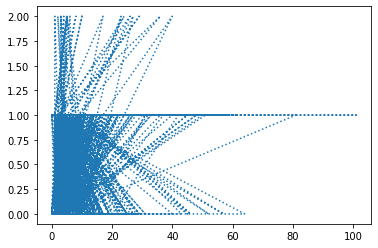

In [179]:
import matplotlib.pyplot as plt
plt.plot(review_positives, summary_positives, linestyle='dotted')
plt.show()



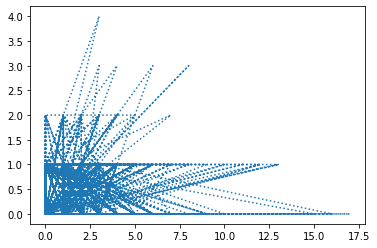

In [181]:
plt.plot(review_negatives, summary_negatives, linestyle='dotted')
plt.show()